In [4]:
import re
import numpy as np
from collections import defaultdict

# -------- config --------
filename = "chi2perexp.txt"

# regexes
model_re = re.compile(r'^(\S+)\s*$')  # e.g. "1pd"
like_re  = re.compile(
    r'-> for\s+(.*?)\s*:\s*loglkl=\s*([-\d\.eE]+)\s*,\s*chi2eff=\s*([-\d\.eE]+)'
)
total_re = re.compile(
    r'-> Total:\s*loglkl=\s*([-\d\.eE]+)\s*,\s*chi2eff=\s*([-\d\.eE]+)'
)

# -------- parsing --------
models = []
chi2_dict = defaultdict(dict)

current_model = None

with open(filename, "r") as f:
    for line in f:
        line = line.strip()
        if not line:
            continue

        # model label
        m = model_re.match(line)
        if m and not line.startswith("->"):
            current_model = m.group(1)
            models.append(current_model)
            continue

        # likelihood line
        m = like_re.search(line)
        if m and current_model is not None:
            lname = m.group(1)
            chi2  = float(m.group(3))
            chi2_dict[lname][current_model] = chi2
            continue

        # total line
        m = total_re.search(line)
        if m and current_model is not None:
            chi2_dict["Total"][current_model] = float(m.group(2))

# -------- build arrays --------
models = np.array(models)

chi2_arrays = {}
for lname, values in chi2_dict.items():
    chi2_arrays[lname] = np.array([
        values.get(m, np.nan) for m in models
    ])

# -------- examples --------
chi2_planck = chi2_arrays["Planck_CamSpec_NPIPE12_7_TTTEEE"]
chi2_lowlEE  =chi2_arrays["Planck_lowl_EE"]
chi2_lowlTT  =chi2_arrays["Planck_lowl_TT"]
chi2_panth = chi2_arrays["Pantheon_Plus_test"]
chi2_desi = chi2_arrays["desi_2025_gaussian_bao_all"]
chi2_sh0es  = chi2_arrays.get("sh0es", None)
chi2_total  = chi2_arrays["Total"]


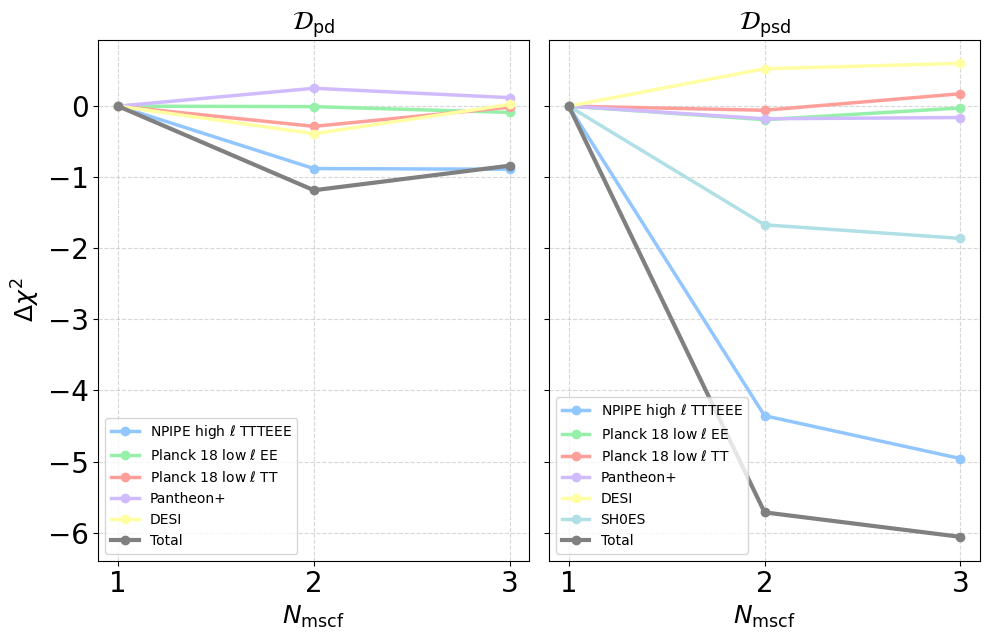

Saved chi2perexp.pdf to /Users/bellamarco01/uni/1_master_thesis/thesis/plots


In [20]:
import matplotlib.pyplot as plt
import plotting.plotting as pl  # your custom plotting module
n_axions = [1,2,3]

datasets = {
    r"NPIPE high $\ell$ TTTEEE": chi2_planck,
    r"Planck 18 low $\ell$ EE": chi2_lowlEE,
    r"Planck 18 low $\ell$ TT": chi2_lowlTT,
    r"Pantheon+": chi2_panth,
    r"DESI": chi2_desi,
    r"SH0ES": chi2_sh0es,
}
idx_pd  = [0, 2, 4]
idx_psd = [1, 3, 5]
fig, axs = pl.new_fig(ncols=2, nrows=1, figsize=[10,6.5])

# Loop over datasets
for name, chi2 in datasets.items():
    if chi2 is None:  # skip missing datasets like SH0ES for pd
        continue

    # PD models (left panel) — skip SH0ES explicitly
    if name != "SH0ES":
        axs[0].plot(
            n_axions,
            chi2[idx_pd]- chi2[0],
            marker="o",
            lw=2.5,
            label=name
        )
    # PSD models (right panel)
    axs[1].plot(
        n_axions,
        chi2[idx_psd] - chi2[1],
        marker="o",
        lw=2.5,
        label=name
    )

axs[0].plot(
    n_axions,
    chi2_total[idx_pd] - chi2_total[0],
    marker="o",
    lw=3,
    label="Total",
    color="grey"
)

# PSD models (right panel)
axs[1].plot(
    n_axions,
    chi2_total[idx_psd] - chi2_total[1],
    marker="o",
    lw=3,
    label="Total",
    color="grey"
)

# Add labels, legends
axs[0].set_xlabel(r"$N_\text{mscf}$", fontsize=18)
axs[1].set_xlabel(r"$N_\text{mscf}$", fontsize=18)
axs[0].set_title(r"$\mathcal{D}^\prime_\text{pd}$", fontsize=18)
axs[1].set_title(r"$\mathcal{D}^\prime_\text{psd}$", fontsize=18)
axs[0].set_ylabel(r"$\Delta\chi^2$", fontsize=18)
axs[0].legend()
axs[1].legend()

plt.xticks([1,2,3])
plt.tight_layout()
plt.show()
fig.save('chi2perexp')


/var/folders/ds/l5tt9lyx5pl1c9t1ytlzxb7w0000gn/T/ipykernel_34680/3136504935.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([r"$\mathcal{D}_\text{pd}$",r"$\mathcal{D}_\text{psd}$"], fontsize=18)


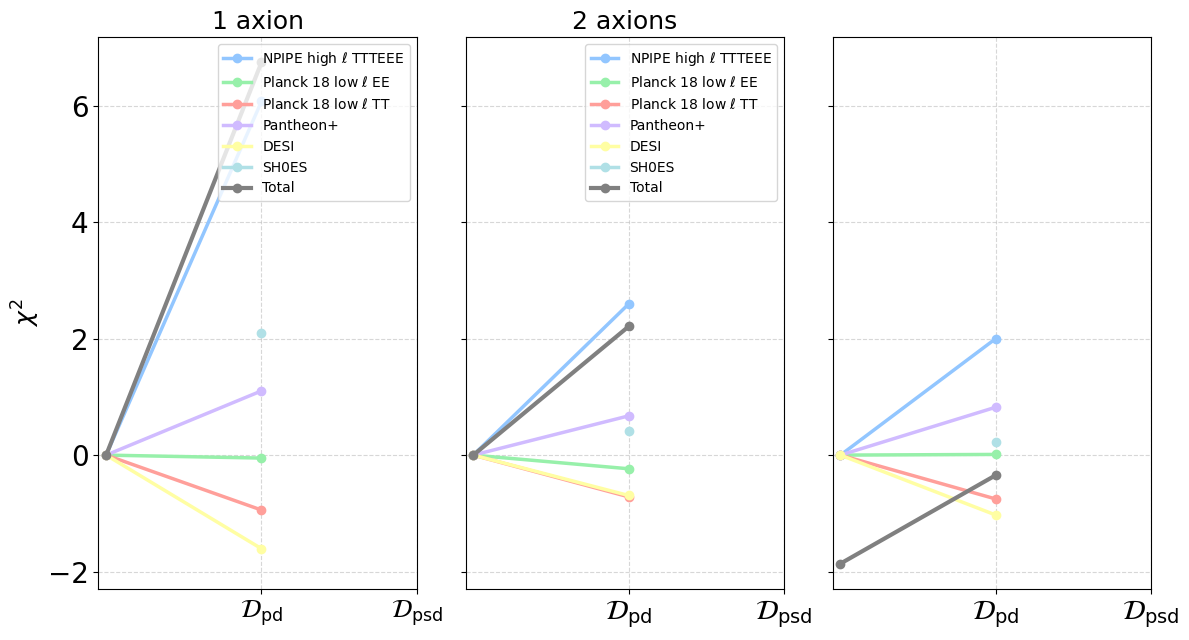

In [12]:
idx_1  = [0,1]
idx_2 =  [2,3]
idx_3 =  [4,5]

fig, axs = pl.new_fig(ncols=3, nrows=1, figsize=[12,6.5])

# Loop over datasets
for name, chi2 in datasets.items():
    if chi2 is None:  # skip missing datasets like SH0ES for pd
        continue
    if name == 'SH0ES':
        # PD models (left panel) — skip SH0ES explicitly
        axs[0].plot(
            chi2[idx_1],
            marker="o",
            lw=2.5,
            label=name
        )
        # PSD models (right panel)
        axs[1].plot(
            chi2[idx_2],
            marker="o",
            lw=2.5,
            label=name
        )
        # PSD models (right panel)
        axs[2].plot(
            chi2[idx_3],
            marker="o",
            lw=2.5,
            label=name
        )
    # PD models (left panel) — skip SH0ES explicitly
    else:
        axs[0].plot(
            chi2[idx_1]- chi2[0],
            marker="o",
            lw=2.5,
            label=name
        )
        # PSD models (right panel)
        axs[1].plot(
            chi2[idx_2] - chi2[2],
            marker="o",
            lw=2.5,
            label=name
        )
        axs[2].plot(
            chi2[idx_3] - chi2[4],
            marker="o",
            lw=2.5,
            label=name
        )


axs[0].plot(
    chi2_total[idx_1] - chi2_total[0],
    marker="o",
    lw=3,
    label="Total",
    color="grey"
)

# PSD models (right panel)
axs[1].plot(
    chi2_total[idx_2] - chi2_total[2],
    marker="o",
    lw=3,
    label="Total",
    color="grey"
)
axs[2].plot(
    chi2_total[idx_3] - chi2_total[3],
    marker="o",
    lw=3,
    label="Total",
    color="grey"
)

# Add labels, legends
axs[0].set_xticklabels([r"$\mathcal{D}_\text{pd}$",r"$\mathcal{D}_\text{psd}$"], fontsize=18)
# axs[1].set_xticks([r"$\mathcal{D}_\text{pd}$",r"$\mathcal{D}_\text{pd}$"], fontsize=18)
axs[0].set_title(r"1 axion", fontsize=18)
axs[1].set_title(r"2 axions", fontsize=18)
axs[0].set_ylabel(r"$\chi^2$", fontsize=18)
axs[0].legend()
axs[1].legend()

plt.xticks([1,2])
plt.tight_layout()
plt.show()
